In [28]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def parse_log(filename):
    with open(filename) as logfile:
        log = []
        cur = None
        ctime = 0
        for line in logfile:
            if ':' in line:
                if cur != None:
                    log.append((ctime,cur))
                header, line = line.split(':')
                ctime = float(header[header.rfind('[')+1:-1])
                cur = {}
            line = line.strip()
            if line.startswith('#'):
                data = line[1:].split('\t')
                values = {}
                for d in data[1:]:
                    name, value = d.split('=')
                    values[name] = float(value)
                cur[int(data[0])] = values
        log.append((ctime, cur))
        return log
def collect(log, id, key):
    time_start = log[0][0]
    x = []
    y = []
    for t, d in log:
        if id in d and key in d[id]:
            x.append(t-time_start)
            y.append(d[id][key])
    return (x, y)

In [34]:
def parse_log2(filename):
    with open(filename) as logfile:
        log = []
        for line in logfile:
            header, body, *_ = line.split(':')
            ctime = float(header[header.rfind('[')+1:-1])
            cur = {}
            body = body.strip()
            if body.startswith('EX'):
                data = body.split('\t')
                for d in data:
                    name, value = d.split('=')
                    cur[name] = float(value)
                log.append((ctime, cur))
    time_start = log[0][0]
    dt, dx, dy = [], [], []
    for t, d in log:
        dt.append(t-time_start)
        dx.append(d['EX'])
        dy.append(d['EY'])
    return (dt, dx, dy)

In [36]:
tm, ex, ey = parse_log2('1.log')

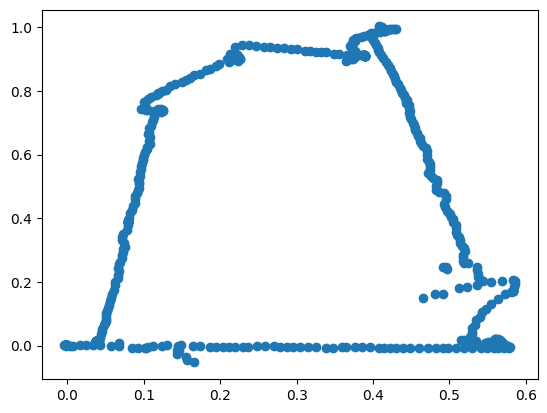

In [37]:
plt.scatter(ex, ey)
plt.show()